In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 构造一组线性数据
np.random.seed(42)
x = np.random.uniform(-3., 3., size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

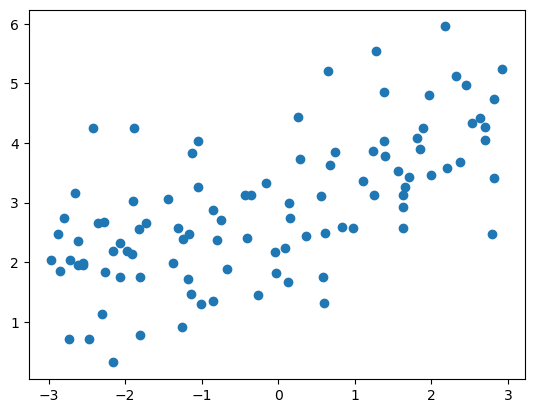

In [3]:
plt.scatter(x, y)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
# 多项式回归

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)
# 训练测试集分离

In [8]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)
# 我们令阶数为20的时候，这个模型很明显是过拟合的

167.94010871138653

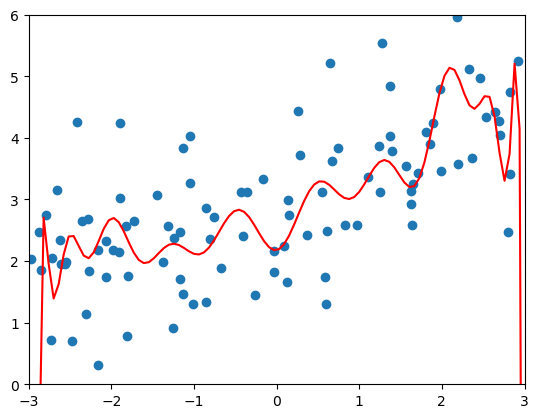

In [11]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])

# 封装一个对应模型的绘画函数
plot_model(poly_reg)

## 使用岭回归

In [12]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
# 先用管道封一个岭回归的函数

In [16]:
ridge1_reg = RidgeRegression(degree=20, alpha=0.01)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

#直接调用，发现确实有很大优化

1.3121406067171628

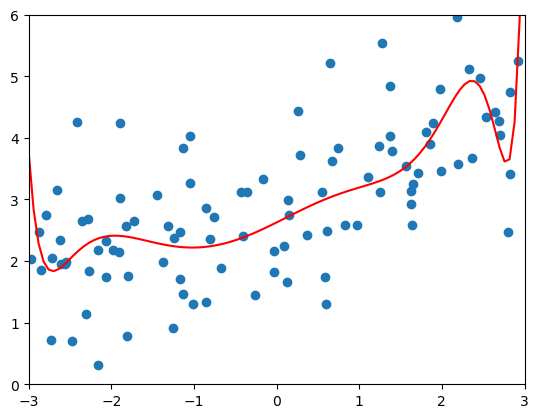

In [17]:
plot_model(ridge1_reg)

In [19]:
ridge4_reg = RidgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

# 将参数设定很大，发现优化过头了

1.8408455590998372

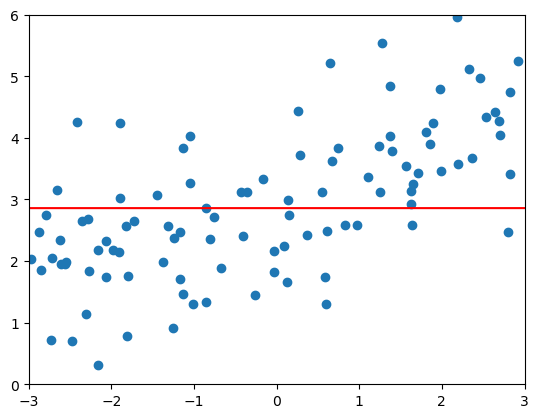

In [21]:
plot_model(ridge4_reg)
# 近似平行直线

## LASSO 回归

In [22]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])
# 同理，封装一个 LASSO 管道模型

In [23]:
lasso1_reg = LassoRegression(degree=20, alpha=0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1496080843259966

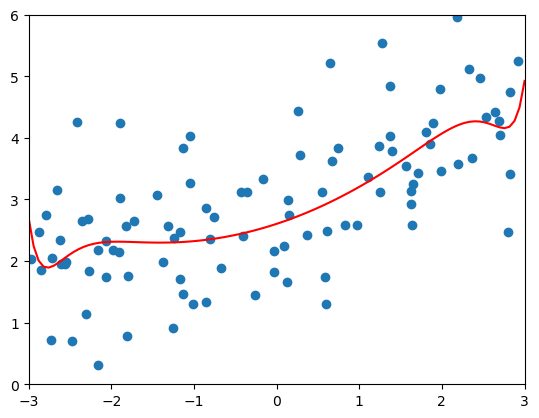

In [24]:
plot_model(lasso1_reg)
# 比起曲线，更近似于直线

In [30]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1213911351818648

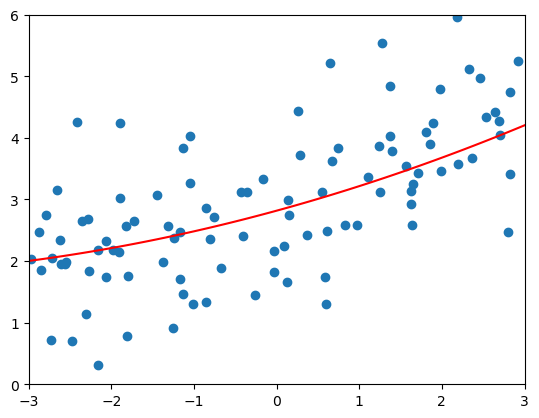

In [32]:
plot_model(lasso2_reg)
# 已经是直线了，说明LASSO回归倾向于特征选择而非优化